In [3]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

data1 = loadmat('lab2_1.mat')
data2 = loadmat('lab2_2.mat')
data3 = loadmat('lab2_3.mat')

a = data1['a']
b = data1['b']

In [4]:
import numpy as np
# Gaussian
mu_hat = np.sum(a) / a.size
sigma_hat = np.sum((a - mu_hat) ** 2) / a.size

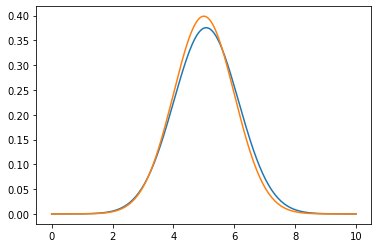

In [5]:
from scipy.stats import norm

xs = np.linspace(0, 10, 200)
ys = norm.pdf(xs, loc=mu_hat, scale=sigma_hat**0.5)
plt.plot(xs, ys, label='estimated dist')
plt.plot(xs, norm.pdf(xs, loc=5, scale=1), label='true dist')
plt.show()

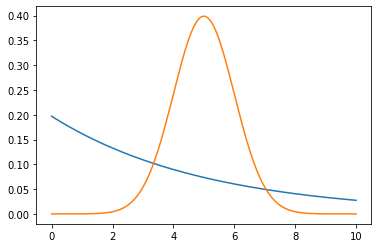

In [9]:
# Exponential
lam = a.size / np.sum(a)
ys_exp = lam * np.exp(-lam * xs)

plt.plot(xs, ys_exp, label='estimated dist')
plt.plot(xs, norm.pdf(xs, loc=5, scale=1), label='true dist')
plt.show()

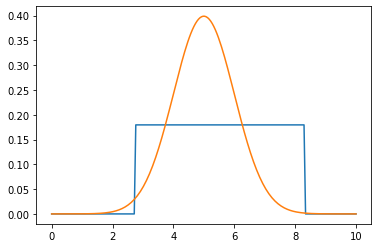

In [14]:
# Uniform
a_hat = np.min(a)
b_hat = np.max(a)

def uniform_pdf(xs, a, b):
    inds = (xs > a) & (xs < b)
    ys = np.zeros_like(xs)
    ys[inds] = 1 / (b - a)
    return ys

ys_uni = uniform_pdf(xs, a_hat, b_hat)

plt.plot(xs, ys_uni, label='estimated dist')
plt.plot(xs, norm.pdf(xs, loc=5, scale=1), label='true dist')
plt.show()

In [16]:
# For array b
# Gaussian
mu_hat = np.sum(b) / b.size
sigma_hat = np.sum((b - mu_hat) ** 2) / b.size
ys_gauss = norm.pdf(xs, loc=mu_hat, scale=sigma_hat**0.5)


# Exponential
lam = b.size / np.sum(b)
ys_exp = lam * np.exp(-lam * xs)

# Uniform
a_hat = np.min(b)
b_hat = np.max(b)
ys_uni = uniform_pdf(xs, a_hat, b_hat)

true_dist = 1 * np.exp(-xs)

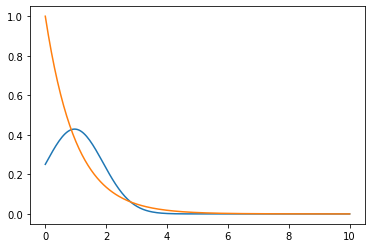

In [18]:
# Gaussian plot
plt.plot(xs, ys_gauss, label='estimated dist')
plt.plot(xs, true_dist, label='true dist')
plt.show()

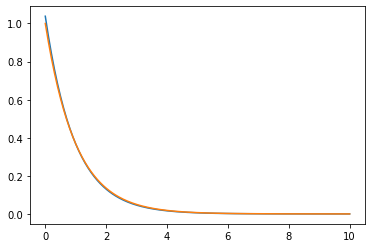

In [19]:
# Expo plot
plt.plot(xs, ys_exp, label='estimated dist')
plt.plot(xs, true_dist, label='true dist')
plt.show()

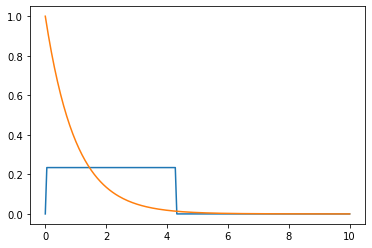

In [20]:
# Uniform plot
plt.plot(xs, ys_uni, label='estimated dist')
plt.plot(xs, true_dist, label='true dist')
plt.show()

In [36]:
# Parzen window
xs = np.linspace(0, 10, 200)

def phi(x, std=0.1):
    return norm.pdf(x, loc=0, scale=std)

ys = [phi(xs - xi, std=0.4) for xi in a.flatten()]  # Change std here to do both 0.1 and 0.4
ys = np.array(ys) / a.size

true_dist_a = norm.pdf(xs, loc=5, scale=1)

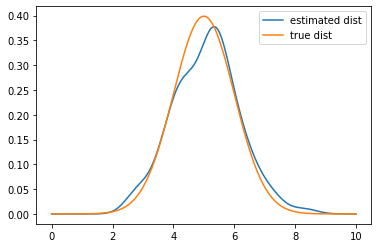

In [37]:
ys = ys.sum(axis=0)
plt.plot(xs, ys, label='estimated dist')
plt.plot(xs, true_dist_a, label='true dist')
plt.legend()
plt.show()

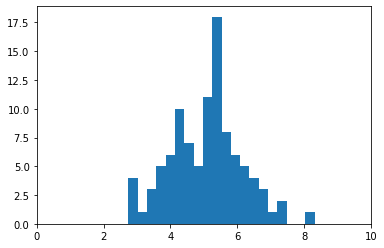

In [35]:
plt.hist(a.flatten(), bins=20)
plt.xlim(0, 10)
plt.show()

In [41]:
# Parzen window for b
# Parzen window
ys = [phi(xs - xi, std=0.1) for xi in b.flatten()]  # Change std here to do both 0.1 and 0.4
ys = np.array(ys) / b.size

true_dist_b = np.exp(-xs)

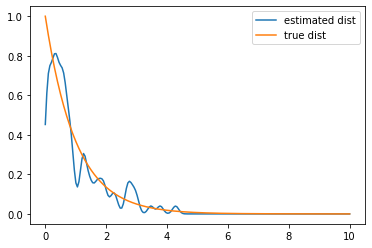

In [42]:
ys = ys.sum(axis=0)
plt.plot(xs, ys, label='estimated dist')
plt.plot(xs, true_dist_b, label='true dist')
plt.legend()
plt.show()

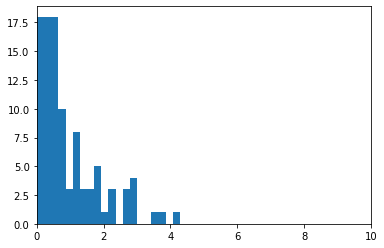

In [40]:
plt.hist(b.flatten(), bins=20)
plt.xlim(0, 10)
plt.show()